In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from pylab import *
%matplotlib inline
import os
from sys import path
np.random.seed(42)

In [2]:
# Add parent directory to path if deepgp is not there already
pwd = os.getcwd()
base_path = pwd[0:pwd.rfind(os.sep)]
path.insert(0,base_path)

In [3]:
import deepgp

### Data to Regress

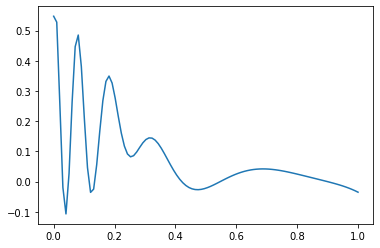

In [20]:
X = np.linspace(0, 1, 100)
Xts = np.array([0, 0.05, ])
Y = -0.5*(np.sin(40*(X-0.85)**4)*np.cos(2.5*(X - 0.95)) + 0.5*(X - 0.9))

plt.plot(X,Y)


In [19]:
Y = -0.5*(np.sin(40*(X-0.85)**4)*np.cos(2.5*(X - 0.95)) + 0.5*(X - 0.9))